### IL-TASK3-EXPLORATORY DATA ANALYSIS (TERRORISM)

*Author - Vibha Rao*

In [ ]:
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
# Let's import to our data and check the basics.
terror = pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [ ]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
terror.columns


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
# I'm just take important data in whole dataset those I'm using further processing.
terror=terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
# Checking the null values in data
terror.isnull().sum()

Year              0
Month             0
Day               0
Country           0
state            10
Region            0
city              0
latitude         48
longitude        48
AttackType        0
Killed          305
Wounded        1062
Target           47
Summary        2188
Group             0
Target_type       0
Weapon_type       0
Motive         2449
dtype: int64

In [ ]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2909 non-null   int64  
 1   Month        2909 non-null   int64  
 2   Day          2909 non-null   int64  
 3   Country      2909 non-null   object 
 4   state        2899 non-null   object 
 5   Region       2909 non-null   object 
 6   city         2909 non-null   object 
 7   latitude     2861 non-null   float64
 8   longitude    2861 non-null   float64
 9   AttackType   2909 non-null   object 
 10  Killed       2604 non-null   float64
 11  Wounded      1847 non-null   float64
 12  Target       2862 non-null   object 
 13  Summary      721 non-null    object 
 14  Group        2909 non-null   object 
 15  Target_type  2909 non-null   object 
 16  Weapon_type  2909 non-null   object 
 17  Motive       460 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usage

# Destructive Feature of data

In [ ]:
print("Country with the most attacks:",terror['Country'].value_counts().idxmax())
print("City with the most attacks:",terror['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror['Group'].value_counts().index[1])
print("Most Attack Types:",terror['AttackType'].value_counts().idxmax())

Country with the most attacks: United States
City with the most attacks: New York City
Region with the most attacks: Western Europe
Year with the most attacks: 1970
Month with the most attacks: 3
Group with the most attacks: Irish Republican Army (IRA)
Most Attack Types: Bombing/Explosion


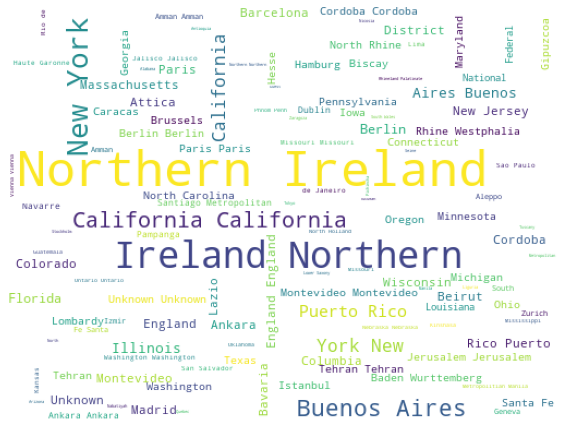

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities = terror.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
terror['Year'].value_counts(dropna = False).sort_index()

1970    651
1971    471
1972    568
1973    473
1974    581
1975    165
Name: Year, dtype: int64

# DATA VISUALISATION

Number of Terrorist Activities each Year

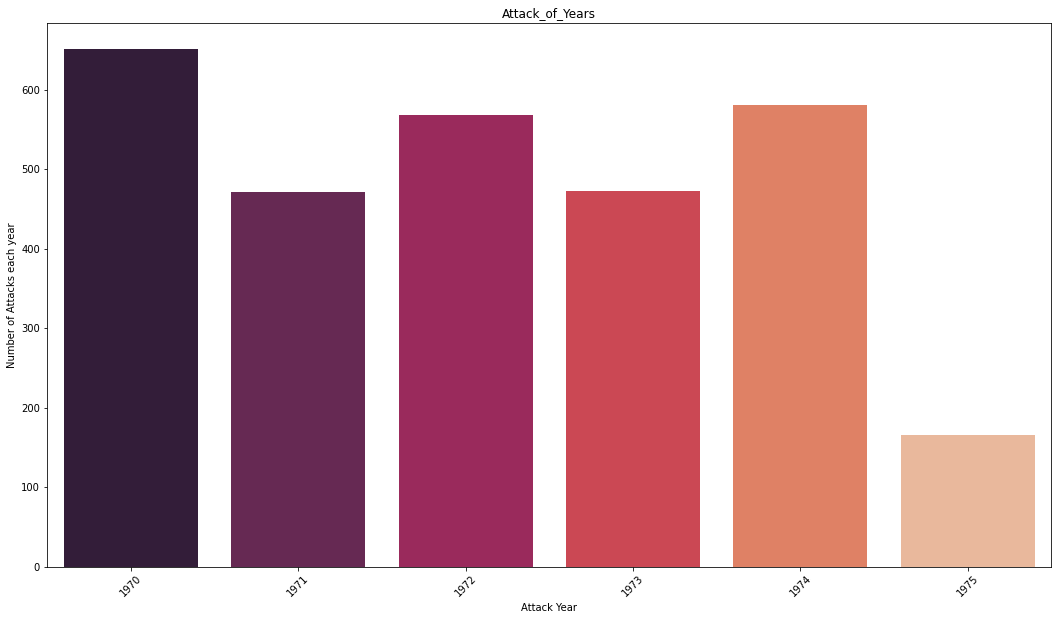

In [ ]:
x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

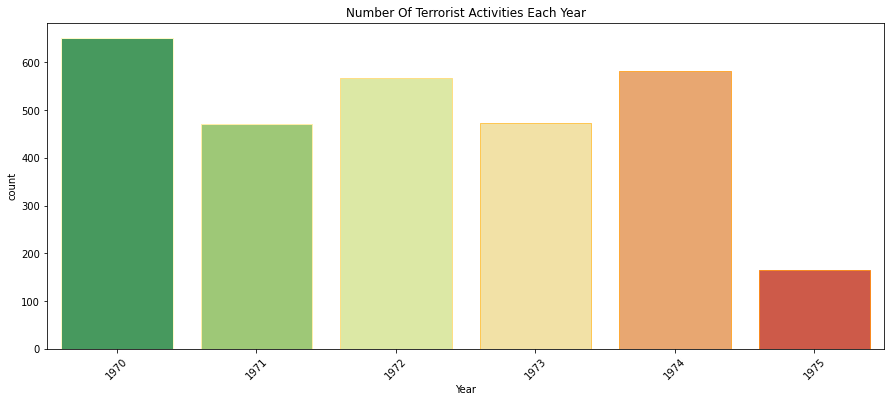

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

 Terrorist Activities by Region in each Year through Area Plot



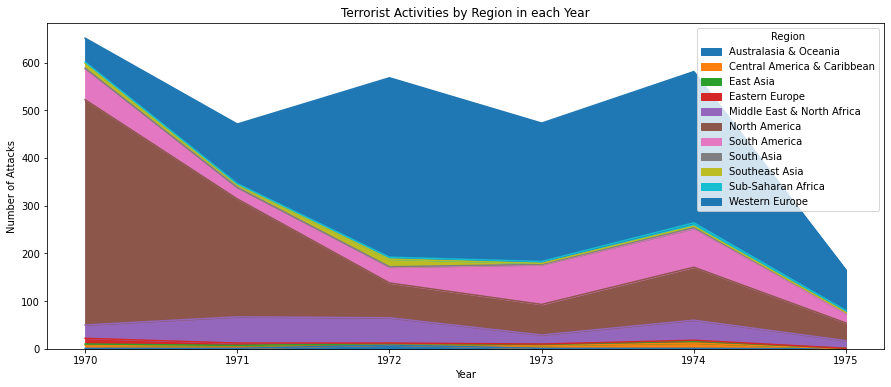

In [ ]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
terror['Wounded'] = terror['Wounded'].fillna(0).astype(int)
terror['Killed'] = terror['Killed'].fillna(0).astype(int)
terror['casualities'] = terror['Killed'] + terror['Wounded']

Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize

In [ ]:
terror1 = terror.sort_values(by='casualities',ascending=False)[:40]

In [ ]:
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [ ]:
heat.head()

Year,1970,1971,1972,1973,1974,1975
Country,,,,,,
Czechoslovakia,0.0,0.0,26.0,0.0,0.000000,0.0
France,0.0,0.0,0.0,23.0,36.000000,0.0
Greece,0.0,0.0,0.0,60.0,88.000000,0.0
Ireland,0.0,0.0,0.0,0.0,26.000000,0.0
Israel,0.0,0.0,98.0,20.0,57.333333,0.0


In [ ]:
terror.Country.value_counts()[:15]

United States         971
United Kingdom        811
Argentina             194
West Germany (FRG)    118
Spain                 108
France                 64
Turkey                 58
Iran                   51
Italy                  49
Uruguay                48
Lebanon                33
Israel                 30
Mexico                 26
Greece                 23
Jordan                 22
Name: Country, dtype: int64

# Top Countries affected by Terror Attacks

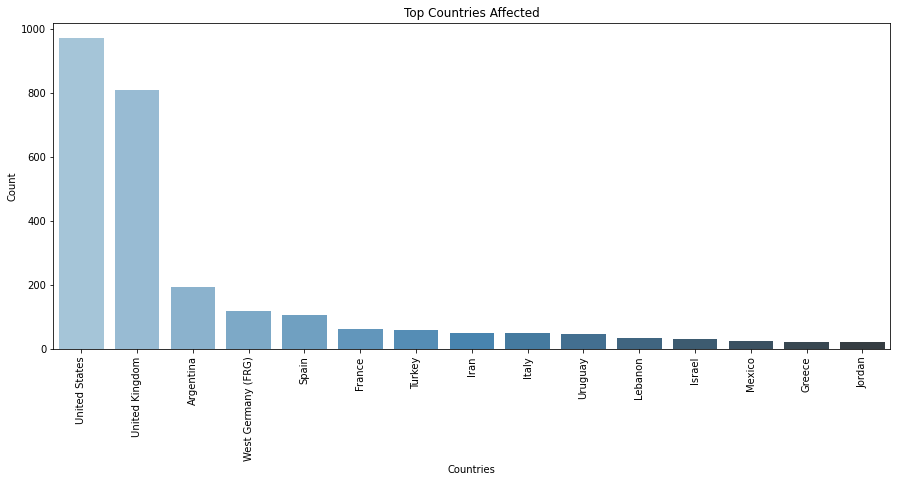

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# ANALYSIS ON CUSTOMIZED DATA

Terrorist Attacks of a Particular year and their Locations


Let's look at the terrorist acts in the world over a certain year.

In [ ]:
import folium
from folium.plugins import MarkerCluster 
filterYear = terror['Year'] == 1970

In [ ]:
filterData = terror[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.

In [ ]:
terror.Group.value_counts()[1:15]

Irish Republican Army (IRA)                             463
Left-Wing Militants                                     169
Protestant extremists                                   119
Black September                                         119
Ulster Volunteer Force (UVF)                             91
Black Nationalists                                       82
Ejercito Revolucionaria del Pueblo (ERP) (Argentina)     76
Student Radicals                                         71
Ulster Freedom Fighters (UFF)                            59
Weather Underground, Weathermen                          43
Tupamaros (Uruguay)                                      41
White extremists                                         40
Popular Front for the Liberation of Palestine (PFLP)     35
Black Liberation Army                                    34
Name: Group, dtype: int64

In [ ]:
test = terror[terror.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [ ]:
test.Country.unique()

array([], dtype=object)

In [ ]:
terror_df_group = terror.dropna(subset=['latitude','longitude'])
terror_df_group = terror_df_group.drop_duplicates(subset=['Country','Group'])
terrorist_groups = terror.Group.value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group.Group.isin(terrorist_groups)]
print(terror_df_group.Group.unique())

['Black Nationalists' 'Left-Wing Militants' 'Irish Republican Army (IRA)'
 'Ulster Volunteer Force (UVF)'
 'Ejercito Revolucionaria del Pueblo (ERP) (Argentina)'
 'Protestant extremists' 'Black September']


In [ ]:
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'], 
                  terror_df_group.iloc[i]['Country'])).add_to(map)
map

The Above map looks untidy even though it can be zoomed in to view the Country in question. Hence in the next chart, I have used Folium's Marker Cluster to cluster these icons. This makes it visually pleasing and highly interactive.

In [ ]:
terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [ ]:
# Total Number of people killed in terror attack
killData = terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 1927


In [ ]:
# Let's look at what types of attacks these deaths were made of.
attackData = terror.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [ ]:
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [ ]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,191,661,865,11,41,91,50,1,16


In [ ]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


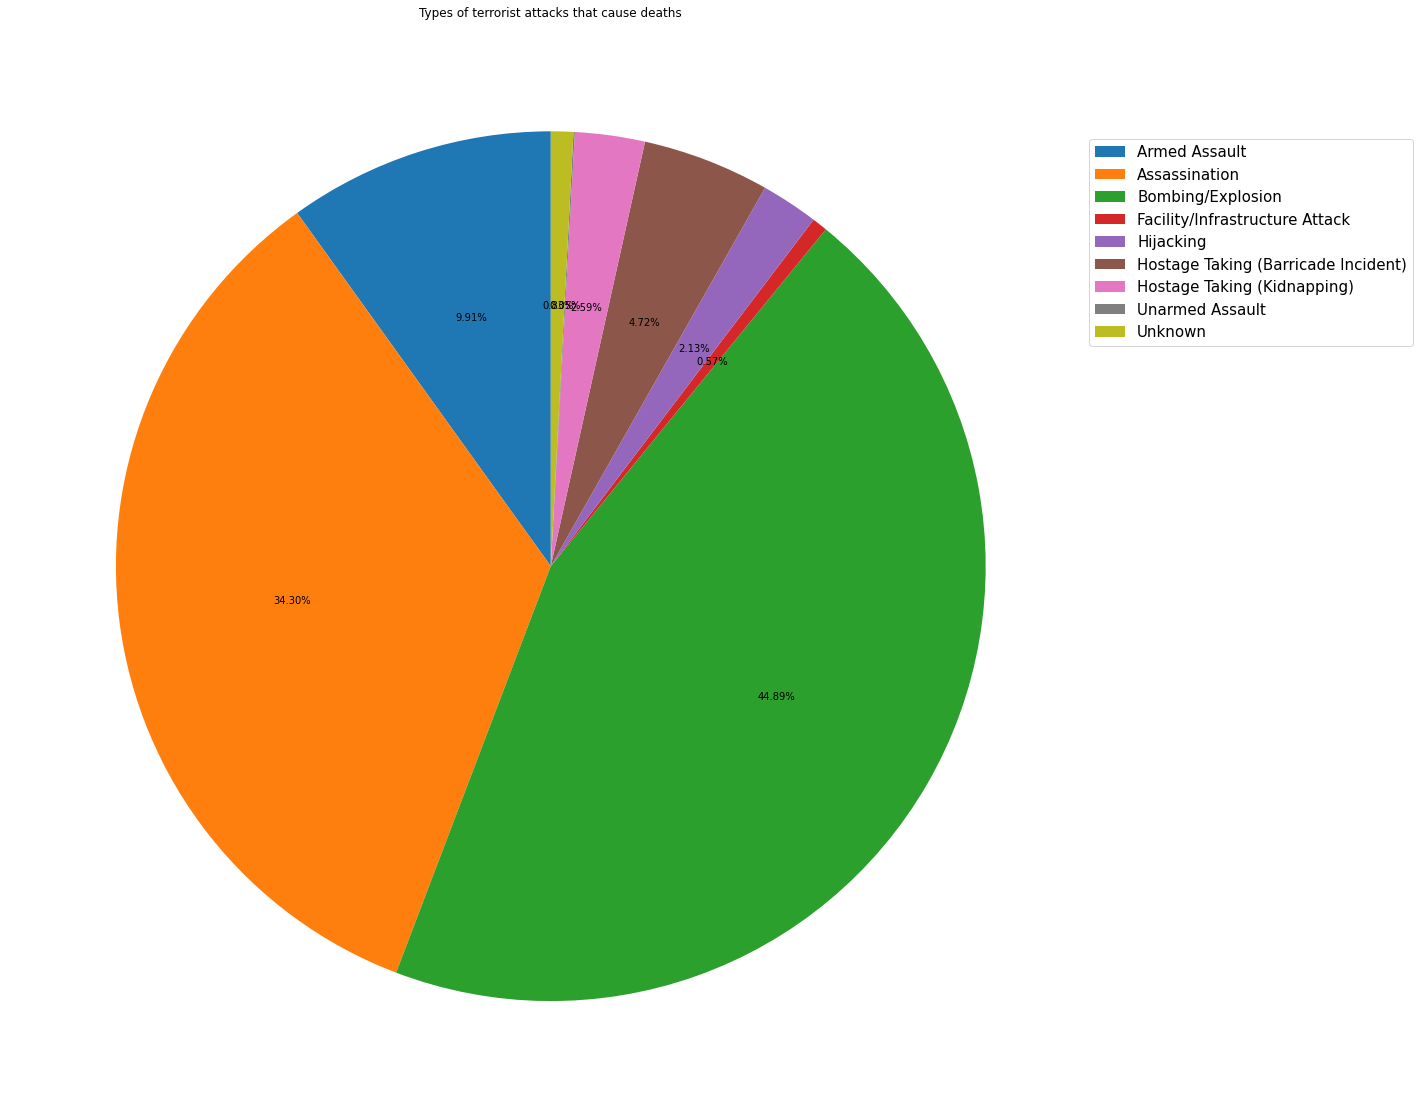

In [ ]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

Armed assault and bombing/explosion are seen to be the cause of 77% of the deaths in these attacks. This rate is why these attacks are used so many times in terrorist actions. This is how dangerous weapons and explosives are to the world.

In [ ]:
#Number of Killed in Terrorist Attacks by Countries
countryData = terror.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [ ]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Algeria,Andorra,Argentina,Australia,Austria,Belgium,Bolivia,Botswana,Brazil,...,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Yugoslavia,Zaire,Zambia
Killed,0,0,0,54,1,4,0,0,1,2,...,1,981,131,4,0,1,33,1,0,4


In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

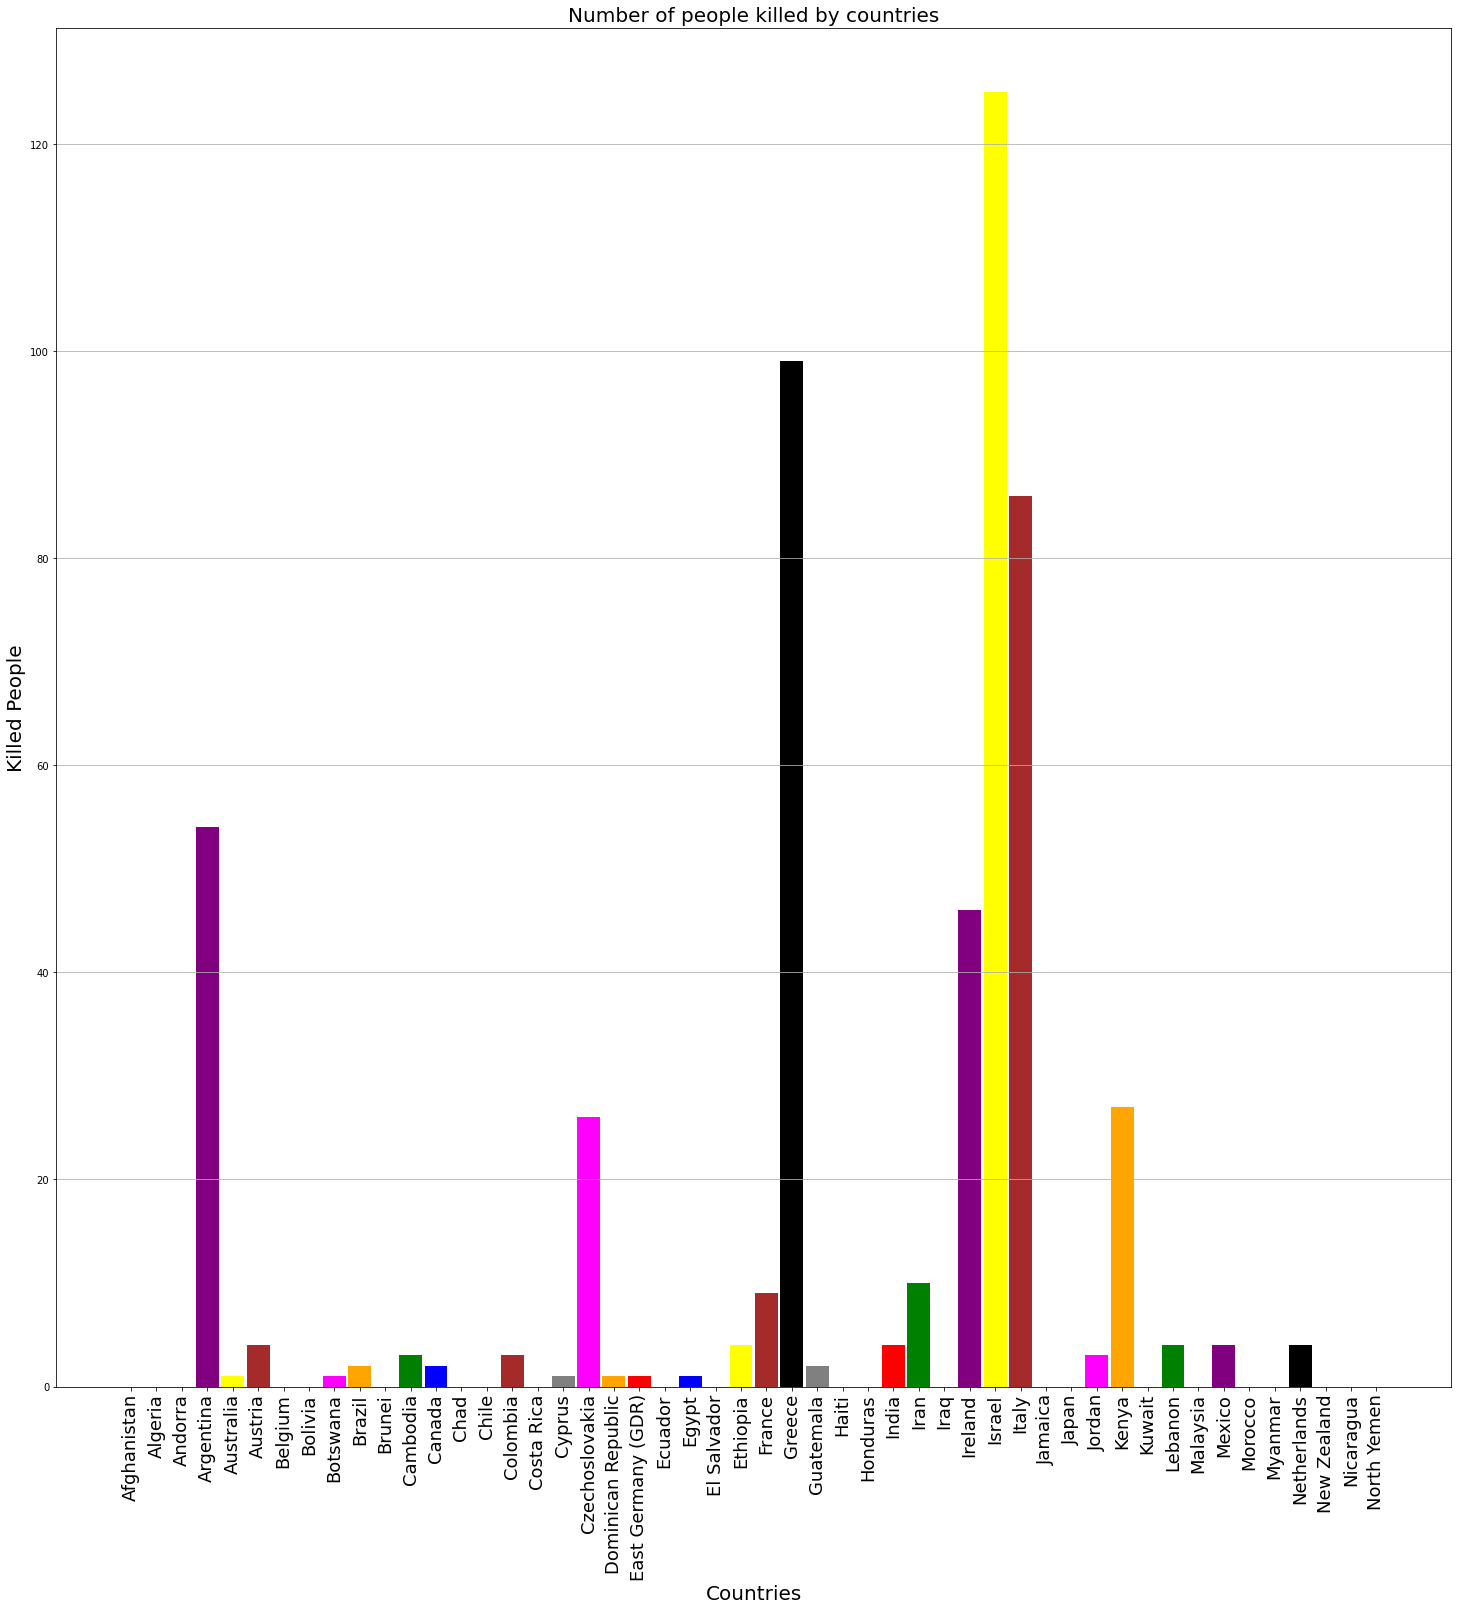

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

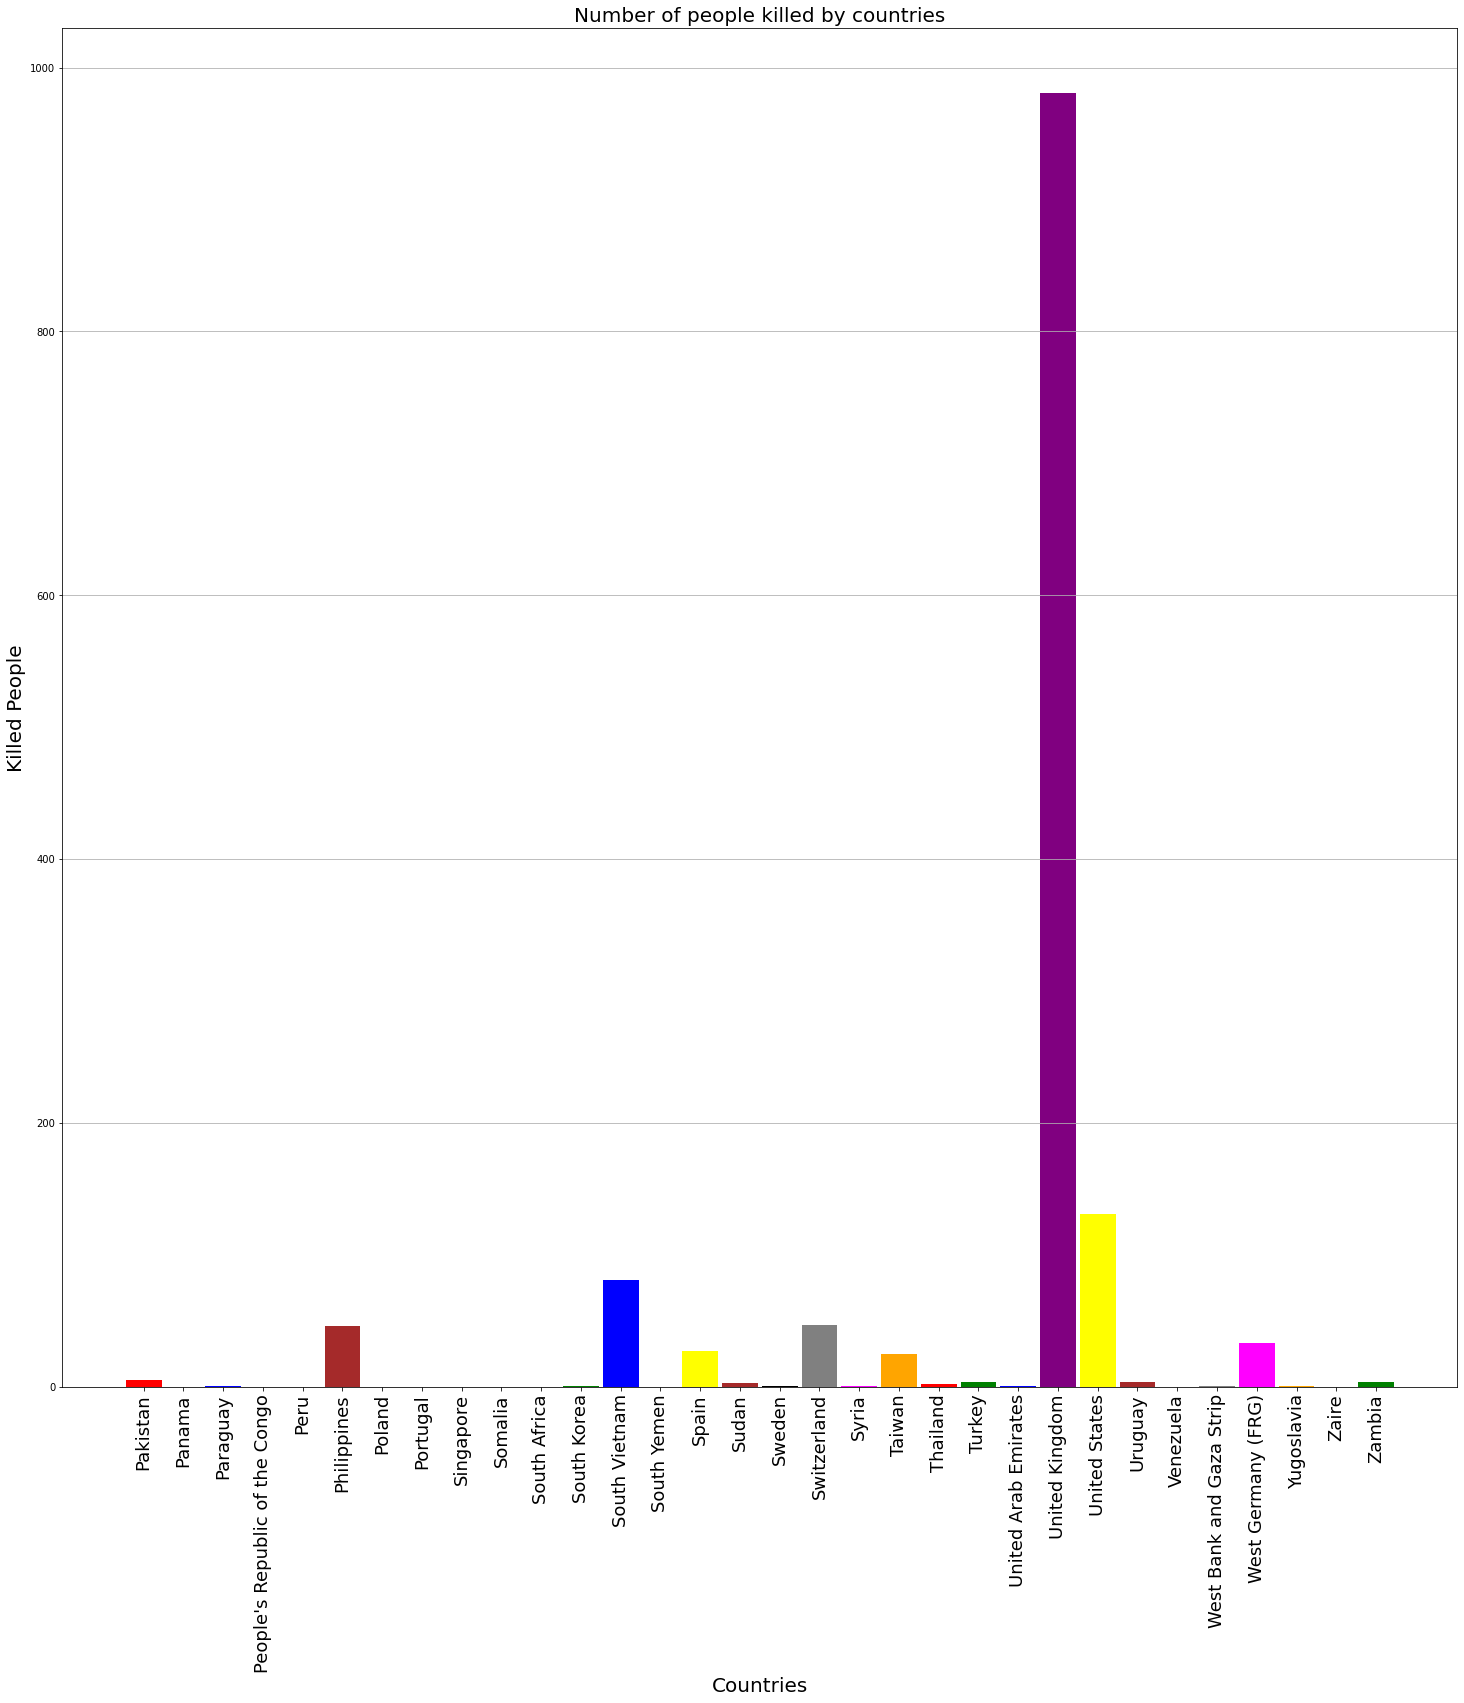

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()